### Context & introduction to our problem

We have data from several companies located in the state of Paraná in Brazil. The source for this data is the platform for open data of the Receita Federal, which is a brazilian federal agency mainly responsible for collecting taxes.

We are working on a new product geared towards business (a B2B product), **so we want to understand and gather insights about those companies that can help us make precise decisions, so we can maximize our sales**. 

### Imports and configurations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import geobr
import seaborn as sbn
import json
import requests
import statsmodels.api as sm
from datetime import datetime
import locale
import warnings

locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
pd.options.display.max_colwidth = 100
%matplotlib inline

### Understanding and pre-processing our cata

In [2]:
data_path = 'data_case_2024_03.csv'
df = pd.read_csv(data_path)
df.head()

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,size_company,juri_description,juri_description_ENG,email_provider
0,79690152000466,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,26 de novembro de 2003,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",Ubiratã - PR,4128005,85440000,"4,750,000.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
1,79690152000385,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,17 de setembro de 1976,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",Loanda - PR,4113502,87900000,"4,750,000.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
2,79690152000628,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,10 de janeiro de 1995,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",Maringá - PR,4115200,87065005,"4,750,000.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br
3,79690152000709,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,22 de junho de 1999,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",Umuarama - PR,4128104,87507011,"4,750,000.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br
4,79690152000113,79690152,MATRIZ,COMERCIAL AGRICOLA DE PARANAVAI LTDA,NaN,22 de novembro de 1968,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",Paranavaí - PR,4118402,87711000,"4,750,000.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),KATOAGRICOLA.COM.BR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977587 entries, 0 to 977586
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   document_number                977587 non-null  int64  
 1   cnpj_basico                    977587 non-null  int64  
 2   establishment_type             977587 non-null  object 
 3   razao_social                   977587 non-null  object 
 4   nome_fantasia                  356890 non-null  object 
 5   opening_date                   977587 non-null  object 
 6   cnae                           977587 non-null  int64  
 7   cnae_description               977587 non-null  object 
 8   mcc                            977587 non-null  int64  
 9   mcc_description                977587 non-null  object 
 10  total_branches_and_associates  977587 non-null  object 
 11  city_state                     977587 non-null  object 
 12  city_code                     

In [4]:
df.isnull().sum()

document_number                       0
cnpj_basico                           0
establishment_type                    0
razao_social                          0
nome_fantasia                    620697
opening_date                          0
cnae                                  0
cnae_description                      0
mcc                                   0
mcc_description                       0
total_branches_and_associates         0
city_state                            0
city_code                             0
zip_code                              0
share_capital                         0
size_company                          0
juri_description                      0
juri_description_ENG                  0
email_provider                   303972
dtype: int64

From here, we can already observe some things:
- **We have about 1 million rows of data, which is an expressive volume for a csv file**
- **The column 'nome_fantasia' has more than half of the rows as null values**
- **The column 'email_provider' has some null values, but probably, we still can work with it**

In [5]:
df.describe()

,document_number,cnpj_basico,cnae,mcc,city_code,zip_code,share_capital
count,"977,587.000","977,587.000","977,587.000","977,587.000","977,587.000","977,587.000","977,587.000"
mean,"28,254,916,197,263.883","28,254,916.197","5,559,244.543","5,707.653","4,112,127.795","84,539,358.345","2,822,309.138"
std,"18,130,163,453,617.320","18,130,163.454","2,149,112.744","1,927.272","7,589.128","2,212,843.474","188,471,713.685"
min,"410,000,647.000",410.000,"111,301.000",742.000,"4,100,103.000","31,150,311.000",0.000
25%,"15,253,408,000,132.500","15,253,408.000","4,520,007.000","5,099.000","4,106,902.000","83,040,420.000","1,000.000"
50%,"27,938,993,000,101.000","27,938,993.000","4,781,400.000","5,734.000","4,108,809.000","85,200,000.000","8,000.000"
75%,"36,538,722,000,141.000","36,538,722.000","7,119,702.000","7,311.000","4,118,204.000","86,191,000.000","30,000.000"
max,"98,586,662,001,080.000","98,586,662.000","9,700,500.000","9,402.000","4,128,807.000","87,990,970.000","41,106,173,952.000"


It seems that the only column which it makes sense to better understand the distribution is the `share_capital` column. The other ones store numeric values, but they are actually categorical as they have qualitative characteristics of our data.

* **From here, we can observe that our share_capital distribution spans very largerly because of the magnitude of each quartil.**
* **We can also see that 75% of our values are below 30K, but the mean is much higher (around 2 million) because the values in the 4th quartil are extremely large. The median is a low value of 8k, which makes sense as the bigger values are few in number of times they appear**

In [6]:
pd.DataFrame(df['share_capital'].value_counts()).head(10)

,count
share_capital,
"10,000.000",108053
"5,000.000",106222
"1,000.000",98698
0.000,76696
1.000,68405
"20,000.000",58304
"30,000.000",36833
"100,000.000",36230
"50,000.000",33875


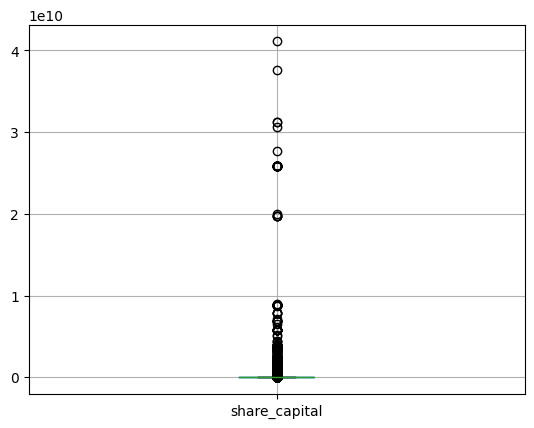

In [7]:
df.boxplot(column=['share_capital'])
plt.show()

As it seems we have a non normal distribution, it seems reasonable to create a histogram of them. Because we have very large values, it'd better to use a logarithm scale both for the x axis and the y axis.

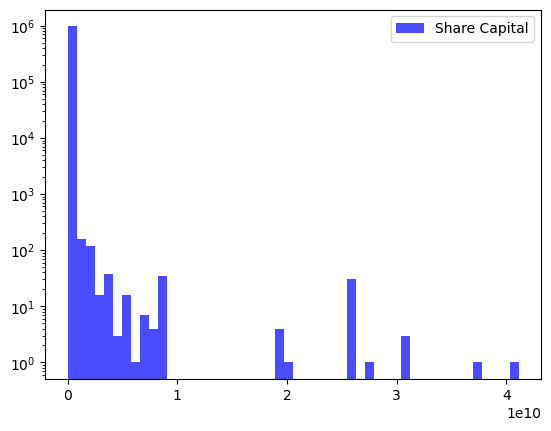

In [8]:
plt.hist(df['share_capital'], bins=50, color='blue', alpha=0.7, log=True, label='Share Capital')
#plt.xscale('log')
plt.legend()
plt.show()

**So we have almost a continuous distribution when we are talking about values below 10 billion. Higher than that number, we have discrete data.**

It would be interesting to know how this specific distribution behaves when we use a Cumulative Distribution Function (CDF) for it.  
We also dividing the bins using a logirithmic function so the values are better spaced.

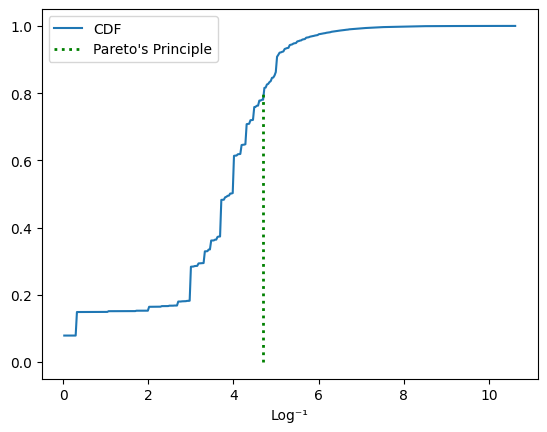

In [9]:
count, bins_count = np.histogram(np.log10(df['share_capital'] + 1), bins='auto')
PDF = count / sum(count)
CDF = np.cumsum(PDF)

#plt.plot(bins_count[1:], PDF, color="red", label="PDF") 
# log10 (x+1) = r   ---->  x + 1 = r¹⁰  --- > x =  r¹⁰ - 1. Convert from log back to our number
plt.plot(bins_count[1:], CDF, label="CDF") 
plt.xlabel("Log⁻¹")
plt.vlines(x=4.7, ymin=0, ymax=0.8, colors='green', ls=':', lw=2, label='Pareto\'s Principle')
plt.legend() 
plt.show()

Basically, what we can get from the graph above is the percentage of values that are lower than the antilogarithm of the x axis values.
If we want to apply something like the Pareto Principle, for example, we can base it on the graph above.
The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the "vital few"). 
* **In this case, that means that 80% of the distribution is lower than 10^(4.7) ~ 50k**

Let's just take a quick look at the companies with a share capital above 10 billion. It seems reasonable that they should be very popular companies with tremendous profit well-known to everyone.

In [10]:
df[df['share_capital'] >= 10000000000].sort_values(by=['share_capital'], ascending=False).head(5)

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,size_company,juri_description,juri_description_ENG,email_provider
888280,8932271000197,8932271,MATRIZ,PAULO JESSE GUIMARAES SCHMIDT,PRESENTES & ARTE,11 de julho de 2007,4763601,Comércio varejista de brinquedos e artigos recreativos,5945,"Hobby, Toy, and Game Shops","{""total_associates"": 1, ""total_branches"": ""1 branch(es)""}",Realeza - PR,4121406,85770000,"41,106,173,952.000",NOT_INFORMED,Empresário (Individual),Sole Proprietorship,NaN
417032,79994075000195,79994075,MATRIZ,ELCONTROL BRASIL ENERGY INDUSTRIAL ELETRICA LTDA,NaN,19 de março de 1987,4742300,Comércio varejista de material elétrico,5211,"Building Materials, Lumber Stores","{""total_associates"": 2, ""total_branches"": ""1 branch(es)""}",Curitiba - PR,4106902,81610130,"37,616,001,024.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
355423,16701716003503,16701716,FILIAL,FCA FIAT CHRYSLER AUTOMOVEIS BRASIL LTDA.,NaN,10 de abril de 2012,4511103,"Comércio por atacado de automóveis, camionetas e utilitários novos e usados",5511,"Car and Truck Dealers (New and Used) Sales, Service, Repairs, Parts, and Leasing","{""total_associates"": 7, ""total_branches"": ""52 branch(es)""}",Campo Largo - PR,4104204,83606360,"31,178,219,520.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),FCAGROUP.COM
775042,16701716000741,16701716,FILIAL,FCA FIAT CHRYSLER AUTOMOVEIS BRASIL LTDA.,NaN,16 de janeiro de 2007,2910701,"Fabricação de automóveis, camionetas e utilitários",5511,"Car and Truck Dealers (New and Used) Sales, Service, Repairs, Parts, and Leasing","{""total_associates"": 7, ""total_branches"": ""52 branch(es)""}",Foz do Iguaçu - PR,4108304,85866900,"31,178,219,520.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),FCAGROUP.COM
20267,1814807000392,1814807,FILIAL,JOHNSON MATTHEY BRASIL LTDA,JOHNSON MATTHEY,22 de agosto de 2014,7020400,"Atividades de consultoria em gestão empresarial, exceto consultoria técnica específica",7392,"Management, Consulting, and Public Relations Services","{""total_associates"": 4, ""total_branches"": ""3 branch(es)""}",Curitiba - PR,4106902,80250104,"30,585,288,704.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),MATTHEY.COM


**This is probably a data quality error about this company PAULO JESSE GUIMARAES SCHMIDT.** It's very likely that this is an error because a share capital of 41 billion for a company with 1 associate, 1 branch and with 1 sole proprietorship is unimaginable. Let's treat it as an outlier and remove it from our data.

In [11]:
df = df[df['document_number'] != 8932271000197] # removing PAULO JESSE GUIMARAES SCHMIDT

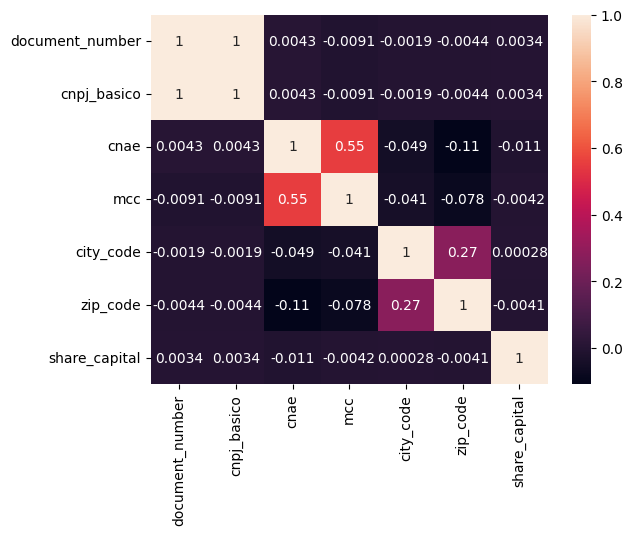

In [12]:
sbn.heatmap(df.corr(numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (20,16)

plt.show()

Here we can see some interesting correlations:
* **The columns document_number and cpnj_basico are heavily related, as the latter one is made of a part of the first one. (1)**
* **The relationship between cnae and mcc was already expected, as the mcc column is derived from the cnae column. (0.55)**
* **The relationship between zip_code and city_code is also expected, as they represent part of the same information about localization (0.27)**

In [13]:
df.nunique()

document_number                  977586
cnpj_basico                      943009
establishment_type                    2
razao_social                     942563
nome_fantasia                    319135
opening_date                      15172
cnae                               1216
cnae_description                   1215
mcc                                 205
mcc_description                     205
total_branches_and_associates       855
city_state                          399
city_code                           399
zip_code                          47596
share_capital                     17511
size_company                          3
juri_description                      4
juri_description_ENG                  4
email_provider                    55288
dtype: int64

* **document_number and cnpj_basico are not 1:1 columns, because they have a different number of distinct values. We can consider that to make sense if some companies have FILIAL companies.**

In [14]:
df[df['establishment_type'] == 'FILIAL'].sort_values(by='share_capital', ascending=False).head()

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,size_company,juri_description,juri_description_ENG,email_provider
355423,16701716003503,16701716,FILIAL,FCA FIAT CHRYSLER AUTOMOVEIS BRASIL LTDA.,NaN,10 de abril de 2012,4511103,"Comércio por atacado de automóveis, camionetas e utilitários novos e usados",5511,"Car and Truck Dealers (New and Used) Sales, Service, Repairs, Parts, and Leasing","{""total_associates"": 7, ""total_branches"": ""52 branch(es)""}",Campo Largo - PR,4104204,83606360,"31,178,219,520.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),FCAGROUP.COM
775042,16701716000741,16701716,FILIAL,FCA FIAT CHRYSLER AUTOMOVEIS BRASIL LTDA.,NaN,16 de janeiro de 2007,2910701,"Fabricação de automóveis, camionetas e utilitários",5511,"Car and Truck Dealers (New and Used) Sales, Service, Repairs, Parts, and Leasing","{""total_associates"": 7, ""total_branches"": ""52 branch(es)""}",Foz do Iguaçu - PR,4108304,85866900,"31,178,219,520.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),FCAGROUP.COM
20267,1814807000392,1814807,FILIAL,JOHNSON MATTHEY BRASIL LTDA,JOHNSON MATTHEY,22 de agosto de 2014,7020400,"Atividades de consultoria em gestão empresarial, exceto consultoria técnica específica",7392,"Management, Consulting, and Public Relations Services","{""total_associates"": 4, ""total_branches"": ""3 branch(es)""}",Curitiba - PR,4106902,80250104,"30,585,288,704.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),MATTHEY.COM
20317,33171026001638,33171026,FILIAL,FCA FIAT CHRYSLER PARTICIPACOES BRASIL LTDA.,FIAT DO BRASIL,06 de agosto de 1999,7020400,"Atividades de consultoria em gestão empresarial, exceto consultoria técnica específica",7392,"Management, Consulting, and Public Relations Services","{""total_associates"": 5, ""total_branches"": ""37 branch(es)""}",Curitiba - PR,4106902,81450903,"27,677,507,584.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),FCAGROUP.COM
756622,2914460014704,2914460,FILIAL,SEARA ALIMENTOS LTDA,SEARA,25 de novembro de 2010,155501,Criação de frangos para corte,763,Agricultural Co-operatives,"{""total_associates"": 6, ""total_branches"": ""650 branch(es)""}",Lapa - PR,4113205,83750000,"25,799,225,344.000",OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),SEARA.COM.BR


In [15]:
df[df['cnpj_basico'] == 2914460].groupby(by=['cnpj_basico', 'document_number', 'share_capital']).size()

cnpj_basico  document_number  share_capital     
2914460      2914460004490    25,799,225,344.000    1
             2914460004571    25,799,225,344.000    1
             2914460004652    25,799,225,344.000    1
             2914460004733    25,799,225,344.000    1
             2914460010628    25,799,225,344.000    1
             2914460012248    25,799,225,344.000    1
             2914460012400    25,799,225,344.000    1
             2914460012590    25,799,225,344.000    1
             2914460012833    25,799,225,344.000    1
             2914460012914    25,799,225,344.000    1
             2914460013058    25,799,225,344.000    1
             2914460014704    25,799,225,344.000    1
             2914460019846    25,799,225,344.000    1
             2914460019927    25,799,225,344.000    1
             2914460022634    25,799,225,344.000    1
             2914460023100    25,799,225,344.000    1
             2914460028241    25,799,225,344.000    1
             2914460028322    25,

From this, we can see that the `share_capital` columns seems to be unique to the `cnpj_basico` column, so we see a share capital duplicated when we are talking about filials of the same company, for example. **For analysis purpose, it would be best to always group the `share_capital` by the `cnpj_basico` column.**

Besides, it'd be interesting to just map the possible values of categorial columns that have few distinct values.

In [16]:
g = lambda x: x.unique()

for column in df.columns:
    if df[column].nunique() <= 10:
        print(f'{column}: {g(df[column])}', end='\n\n')

establishment_type: ['FILIAL' 'MATRIZ']

size_company: ['OTHER' 'SMALL_COMPANY' 'NOT_INFORMED']

juri_description: ['Sociedade Empresária Limitada' 'Empresário (Individual)'
 'Sociedade Simples Limitada'
 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)']

juri_description_ENG: ['Limited Liability Company (LLC)' 'Sole Proprietorship'
 'Limited Partnership' 'Single-Member Limited Liability Company (LLC)']



In [17]:
df.groupby(by='size_company').size()

size_company
NOT_INFORMED     855017
OTHER             63385
SMALL_COMPANY     59184
dtype: int64

At first glance, the column size_company doesn't seem to be that useful. It only stores 3 distinct values and we can ignore the 'NOT_INFORMED' value, leaving us with 'OTHER' and 'SMALL_COMPANY' which doesn't tell us much, beside the fact that a company is either a small company or not.

In [18]:
# It would do us much better to just rename the column and replace the values with bool values
warnings.simplefilter(action='ignore', category=FutureWarning)
df['size_company'].replace({'OTHER': 'NOT_SMALL_COMPANY'}, inplace=True)
df['size_company'].replace({'SMALL_COMPANY': True, 'NOT_SMALL_COMPANY': False, 'NOT_INFORMED': np.nan}, inplace=True)
df.rename(columns={'size_company': 'small_company'}, inplace=True)
print(df.groupby(by='small_company').size())

small_company
False    63385
True     59184
dtype: int64


In [19]:
def remove_duplicates(data: pd.DataFrame) -> pd.DataFrame:
    processed_data = data.copy()

    # Remove duplicates
    rows_duplicated = processed_data.duplicated()
    if rows_duplicated.any():
        processed_data = processed_data[~rows_duplicated]
    print(f'Removed {rows_duplicated.sum()} rows due to being duplicates')
    
    return processed_data

df = remove_duplicates(df)

Removed 0 rows due to being duplicates


The column `nome_fantasia` has too many null values but it contains useful info because it's the business name for companies. Let's just merge it with the `razao_social` column so we can have a source of truth for the name of the company, first looking at the `nome_fantasia` column, but if it returns a null value, let's look at `razao_social`

In [20]:
df.groupby(by='nome_fantasia').size()

nome_fantasia
& GASTRONOMIA                           1
'                                       6
' BAZAR OLIVEIRA'                       1
' ERVAS FINA GASTRONOMIA CONGELADA '    1
' MOVEIS COSTA '                        1
                                       ..
k industrial inox                       1
mateus bauchrowitz                      1
sa86store                               1
the family                              1
zeferino tecnologia                     1
Length: 319135, dtype: int64

In [21]:
# Remove ' character from both beggining and end
df['nome_fantasia'] = df['nome_fantasia'].str.strip("'").str.strip()

# Convert every string to upper case in order to have a common pattern
df['nome_fantasia'] = df['nome_fantasia'].str.upper()

# . character data quality
df['nome_fantasia'] = df['nome_fantasia'].apply(lambda x: np.nan if x == '.' else x)

# If nome_fantasia is null, fill it with razao_social column. Now we have a unique source of truth for company name
df['nome_fantasia'] = df['nome_fantasia'].fillna(df['razao_social'])
df = df.rename(columns={'nome_fantasia': 'company_name'})
print(df['company_name'].value_counts(), df.shape, sep='\n\n')

company_name
O BOTICARIO                                      141
ODONTO EXCELLENCE                                111
CACAU SHOW                                       107
VIACAO GARCIA LTDA                               100
COMERCIAL DE MOVEIS BRASILIA LTDA                 76
                                                ... 
MARCIA RODRIGUES CARDOSO DA SILVA 04468057939      1
21.716.072 CLAUDINEIA MARTINS DELFLAXE             1
PANIFICADORA E MERCEARIA GALDINO                   1
NOELI RAMOS DE MORAES 03288410990                  1
XAMITTON BR                                        1
Name: count, Length: 928767, dtype: int64

(977586, 19)


In [22]:
# We'll make an exception to the company GREEN FIELD - LOTE - QUADRA because it has many weirds values
# They are probably land sites for building houses. In this case, let's use the razao_social value instead
bool_mask = df['company_name'].str.contains('GREEN FIELD - LOTE')
df.loc[bool_mask, 'company_name'] = df.loc[bool_mask, 'razao_social']
df[bool_mask].head()

,document_number,cnpj_basico,establishment_type,razao_social,company_name,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,small_company,juri_description,juri_description_ENG,email_provider
102759,15913061001270,15913061,FILIAL,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,04 de outubro de 2013,4110700,Incorporação de empreendimentos imobiliários,1520,General Contractors—Residential and Commercial,"{""total_associates"": 3, ""total_branches"": ""372 branch(es)""}",Fazenda Rio Grande - PR,4107652,83820074,"5,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
102760,15913061033040,15913061,FILIAL,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,23 de julho de 2015,4110700,Incorporação de empreendimentos imobiliários,1520,General Contractors—Residential and Commercial,"{""total_associates"": 3, ""total_branches"": ""372 branch(es)""}",Fazenda Rio Grande - PR,4107652,83820822,"5,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),JMEJM.COM.BR
102761,15913061029107,15913061,FILIAL,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,23 de julho de 2015,4110700,Incorporação de empreendimentos imobiliários,1520,General Contractors—Residential and Commercial,"{""total_associates"": 3, ""total_branches"": ""372 branch(es)""}",Fazenda Rio Grande - PR,4107652,83820830,"5,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),JMEJM.COM.BR
102762,15913061005267,15913061,FILIAL,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,27 de dezembro de 2013,4110700,Incorporação de empreendimentos imobiliários,1520,General Contractors—Residential and Commercial,"{""total_associates"": 3, ""total_branches"": ""372 branch(es)""}",Fazenda Rio Grande - PR,4107652,83820765,"5,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
102763,15913061025101,15913061,FILIAL,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,23 de julho de 2015,4110700,Incorporação de empreendimentos imobiliários,1520,General Contractors—Residential and Commercial,"{""total_associates"": 3, ""total_branches"": ""372 branch(es)""}",Fazenda Rio Grande - PR,4107652,83820816,"5,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),JMEJM.COM.BR


**Let's also remove those weird numbers from the name of the companies and also remove the blank space at the start and at the end of the string**

In [23]:

df['company_name'] = df['company_name'].str.replace('\d+', '', regex=True).str.strip()
print(df['company_name'].value_counts(), df.shape, sep='\n\n')

company_name
LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.    358
O BOTICARIO                                      141
ODONTO EXCELLENCE                                111
CACAU SHOW                                       107
VIACAO GARCIA LTDA                               100
                                                ... 
CAMILA CAROLINE DE FREITAS                         1
CASA DO CHURRASQUEIRO BONANZA                      1
RAFAELA BATISTA COIMBRA MACHADO                    1
L A RAMALHO CAPAS                                  1
XAMITTON BR                                        1
Name: count, Length: 911468, dtype: int64

(977586, 19)


In [24]:
# Example: this was 'CRISTIANE DE FATIMA SOARES 04874540902' before
df[df['company_name'] == 'CRISTIANE DE FATIMA SOARES']

,document_number,cnpj_basico,establishment_type,razao_social,company_name,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,small_company,juri_description,juri_description_ENG,email_provider
335207,33304082000117,33304082,MATRIZ,CRISTIANE DE FATIMA SOARES 04874540902,CRISTIANE DE FATIMA SOARES,09 de abril de 2019,1091101,Fabricação de produtos de panificação industrial,5462,Bakeries,"{""total_associates"": 1, ""total_branches"": ""1 branch(es)""}",União da Vitória - PR,4128203,84607132,"30,000.000",NaN,Empresário (Individual),Sole Proprietorship,GMAIL.COM


**Let's transform the opening_data column with a date written in portuguse to proper datetime objects**  
**Objective: 09 de abril de 2019 -> 2019, 04, 9**

In [25]:

df['opening_date_datetime'] = df['opening_date'].apply(lambda date: datetime.strptime(date, '%d de %B de %Y'))
df['opening_date_datetime_year'] = df['opening_date_datetime'].dt.year
df['opening_date_datetime_month'] = df['opening_date_datetime'].dt.month
df['opening_date_datetime_day'] = df['opening_date_datetime'].dt.day

df = df.drop(columns=['opening_date'])

df[['opening_date_datetime', 'opening_date_datetime_year', 'opening_date_datetime_month', 'opening_date_datetime_day']].head()

,opening_date_datetime,opening_date_datetime_year,opening_date_datetime_month,opening_date_datetime_day
0,2003-11-26,2003,11,26
1,1976-09-17,1976,9,17
2,1995-01-10,1995,1,10
3,1999-06-22,1999,6,22
4,1968-11-22,1968,11,22


In [26]:
df.head()

,document_number,cnpj_basico,establishment_type,razao_social,company_name,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,...,zip_code,share_capital,small_company,juri_description,juri_description_ENG,email_provider,opening_date_datetime,opening_date_datetime_year,opening_date_datetime_month,opening_date_datetime_day
0,79690152000466,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",...,85440000,"4,750,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN,2003-11-26,2003,11,26
1,79690152000385,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",...,87900000,"4,750,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN,1976-09-17,1976,9,17
2,79690152000628,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",...,87065005,"4,750,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br,1995-01-10,1995,1,10
3,79690152000709,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",...,87507011,"4,750,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br,1999-06-22,1999,6,22
4,79690152000113,79690152,MATRIZ,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)","{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",...,87711000,"4,750,000.000",False,Sociedade Empresária Limitada,Limited Liability Company (LLC),KATOAGRICOLA.COM.BR,1968-11-22,1968,11,22


**It would be interesting to unnest this `total_branches_and_associate` into separate columns, so we can gain acess to those values more easily if we need it**

In [27]:
df['total_branches_and_associates'].head()

0    {"total_associates": 8, "total_branches": "12 branch(es)"}
1    {"total_associates": 8, "total_branches": "12 branch(es)"}
2    {"total_associates": 8, "total_branches": "12 branch(es)"}
3    {"total_associates": 8, "total_branches": "12 branch(es)"}
4    {"total_associates": 8, "total_branches": "12 branch(es)"}
Name: total_branches_and_associates, dtype: object

In [28]:
g = lambda x: json.loads(x).get('total_associates')
h = lambda x: json.loads(x).get('total_branches')

df['total_associates'] = df['total_branches_and_associates'].apply(g)
df['total_branches'] = df['total_branches_and_associates'].apply(h)
df[['total_branches_and_associates', 'total_associates', 'total_branches']].head()

,total_branches_and_associates,total_associates,total_branches
0,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12 branch(es)
1,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12 branch(es)
2,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12 branch(es)
3,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12 branch(es)
4,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12 branch(es)


In [29]:
# Beside, we can convert the `total_branches` to integers only, removing the string part containing 'branch(es)'
df['total_branches'] = df['total_branches'].str.extract('(\d+)')
df[['total_branches_and_associates', 'total_associates', 'total_branches']].head()

,total_branches_and_associates,total_associates,total_branches
0,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12
1,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12
2,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12
3,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12
4,"{""total_associates"": 8, ""total_branches"": ""12 branch(es)""}",8,12


In [30]:
# Now we can drop the total_branches_and_associates column
df = df.drop(columns=['total_branches_and_associates'])

**The column city_state contains both city and state. If we want to analyze by state, for example, it would be nice to have a state column**

In [31]:
df[['city', 'state']] = df['city_state'].str.split(' - ', expand=True)

In [32]:
df[['city_state', 'city', 'state']].tail()

,city_state,city,state
977582,Curitiba - PR,Curitiba,PR
977583,Cambé - PR,Cambé,PR
977584,Curitiba - PR,Curitiba,PR
977585,Irati - PR,Irati,PR
977586,Piraquara - PR,Piraquara,PR


In [33]:
df = df.drop(columns='city_state')

In [34]:
df.head()

,document_number,cnpj_basico,establishment_type,razao_social,company_name,cnae,cnae_description,mcc,mcc_description,city_code,...,juri_description_ENG,email_provider,opening_date_datetime,opening_date_datetime_year,opening_date_datetime_month,opening_date_datetime_day,total_associates,total_branches,city,state
0,79690152000466,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4128005,...,Limited Liability Company (LLC),NaN,2003-11-26,2003,11,26,8,12,Ubiratã,PR
1,79690152000385,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4113502,...,Limited Liability Company (LLC),NaN,1976-09-17,1976,9,17,8,12,Loanda,PR
2,79690152000628,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4115200,...,Limited Liability Company (LLC),katoagricola.com.br,1995-01-10,1995,1,10,8,12,Maringá,PR
3,79690152000709,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4128104,...,Limited Liability Company (LLC),katoagricola.com.br,1999-06-22,1999,6,22,8,12,Umuarama,PR
4,79690152000113,79690152,MATRIZ,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4118402,...,Limited Liability Company (LLC),KATOAGRICOLA.COM.BR,1968-11-22,1968,11,22,8,12,Paranavaí,PR


**Process all email_provider to minuscule to have a common pattern**

In [35]:
df['email_provider'] = df['email_provider'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['email_provider']

0                         NaN
1                         NaN
2         katoagricola.com.br
3         katoagricola.com.br
4         katoagricola.com.br
                 ...         
977582       assessore.com.br
977583                    NaN
977584    dantasenittaadv.com
977585          fobras.com.br
977586        xamitton.com.br
Name: email_provider, Length: 977586, dtype: object

### Analysis & Insights

Given that we unnested some columns, changed data types, removed duplicates and other cleaning processes, we should start trying to gain some insight from our clean data now.

In [36]:
df.columns

Index(['document_number', 'cnpj_basico', 'establishment_type', 'razao_social',
       'company_name', 'cnae', 'cnae_description', 'mcc', 'mcc_description',
       'city_code', 'zip_code', 'share_capital', 'small_company',
       'juri_description', 'juri_description_ENG', 'email_provider',
       'opening_date_datetime', 'opening_date_datetime_year',
       'opening_date_datetime_month', 'opening_date_datetime_day',
       'total_associates', 'total_branches', 'city', 'state'],
      dtype='object')

#### **Any conclusions based on the number of companies created by date, month, year etc?**

In [37]:
date = df.groupby(by='opening_date_datetime')['document_number'].count().reset_index().rename(columns={'document_number': 'count'})
month = df.groupby(by='opening_date_datetime_month')['document_number'].count().reset_index().rename(columns={'document_number': 'count'})
year = df.groupby(by='opening_date_datetime_year')['document_number'].count().reset_index().rename(columns={'document_number': 'count'})
month

,opening_date_datetime_month,count
0,1,82664
1,2,86889
2,3,94029
3,4,83880
4,5,89980
5,6,87587
6,7,82481
7,8,84858
8,9,79472
9,10,79610


In [38]:
fig = make_subplots(rows=2, cols=1)

date = date[date['opening_date_datetime'] >= datetime(1970, 1, 1)]
fig.add_trace(go.Scatter(x=date['opening_date_datetime'], y=date['count'], name='Daily'), row=1, col=1)

fig.add_trace(go.Scatter(x=month['opening_date_datetime_month'], y=month['count'], name='Monthly'), row=2, col=1,  )

# reduce 'carga cognitiva'
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

#fig.add_trace(go.Scatter(x=year['opening_date_datetime_year'], y=year['count'], name='Yearly'), row=3, col=1)


fig.update_layout(height=1200, width=1100, title_text="Companies created in Paraná - BR")
fig.show()

* **Most companies are created in the first half of the year, with very few companies being created in december, for example.**
* **We had a boom of companies being opened from january of 1994 to october of 1996 at very specific days, almost at the start of each month**
* **The number of companies being created by year has been increasing historically, although it had a steep low during the pandemic probably.**

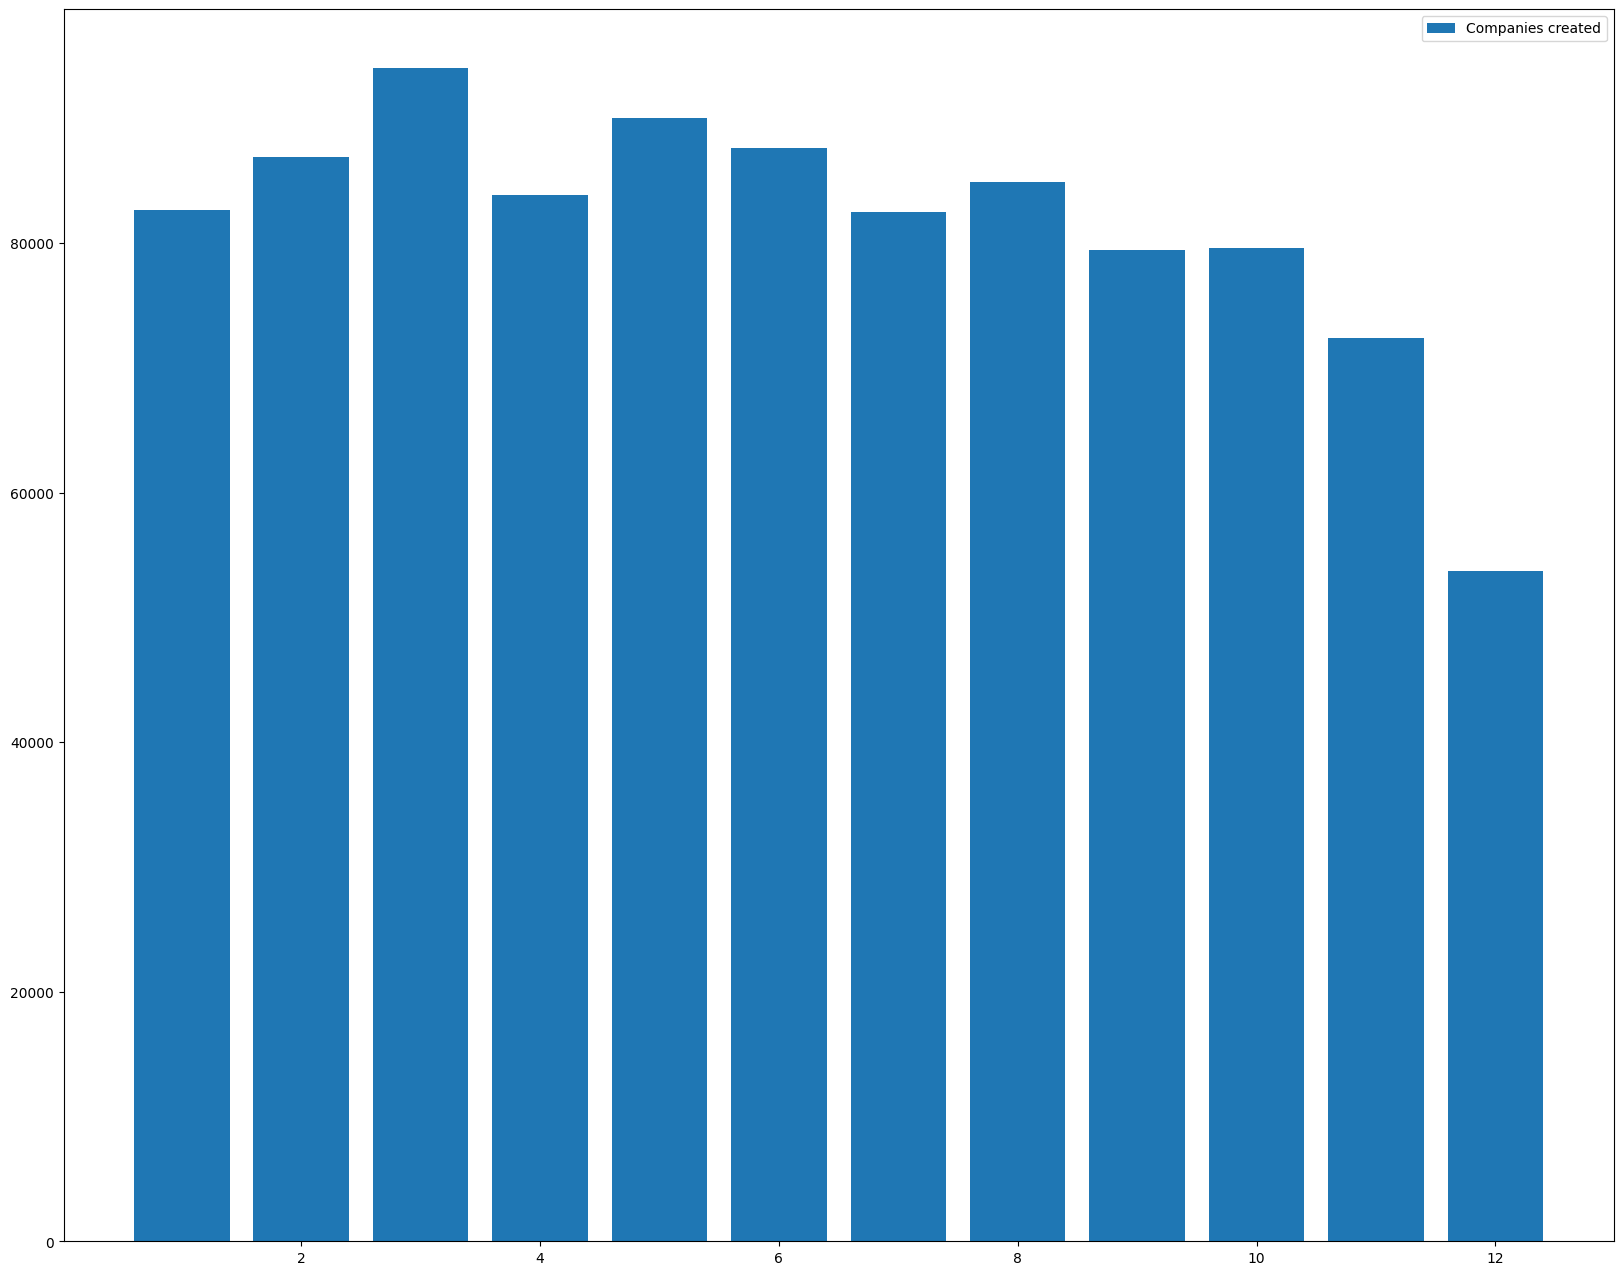

In [39]:
plt.bar(month['opening_date_datetime_month'], month['count'], label='Companies created')
plt.legend()
plt.show()

In [40]:
t = df[(df['opening_date_datetime'].dt.year >= 1995) & (df['opening_date_datetime'].dt.year <= 1997)]
p = t.groupby(by='opening_date_datetime')['document_number'].count().reset_index().rename(columns={'document_number': 'count'})

In [41]:
p['day'] = p['opening_date_datetime'].dt.day
p = p.groupby(by='day')['count'].sum().reset_index()
p['count'] = p['count'] * 100/ p['count'].sum()
p = p.rename(columns={'count': 'Companies'})
p

,day,Companies
0,1,13.101
1,2,4.091
2,3,2.780
3,4,2.469
4,5,2.622
5,6,2.487
6,7,2.469
7,8,2.262
8,9,2.527
9,10,4.149


In [42]:
fig = px.bar(p, x='day', y='Companies', color='Companies')
fig.update_layout(xaxis=dict(title='Day', tickmode='linear'))
fig.update_yaxes(ticksuffix="%", showgrid=False, title='Companies')
fig.update_xaxes(showgrid=False)
fig.show()

In [43]:
df[(df['opening_date_datetime_day'] == 1) & (df['opening_date_datetime_year'] == 1995)]

,document_number,cnpj_basico,establishment_type,razao_social,company_name,cnae,cnae_description,mcc,mcc_description,city_code,...,juri_description_ENG,email_provider,opening_date_datetime,opening_date_datetime_year,opening_date_datetime_month,opening_date_datetime_day,total_associates,total_branches,city,state
253,1011673000100,1011673,MATRIZ,BACURI AGRONEGOCIOS LTDA,BACURI AGRONEGOCIOS LTDA,4661300,"Comércio atacadista de máquinas, aparelhos e equipamentos para uso agropecuário; partes e peças",5599,"Miscellaneous Automotive, Aircraft, and Farm Equipment Dealers (Not Elsewhere Classified)",4106902,...,Limited Liability Company (LLC),NaN,1995-12-01,1995,12,1,1,1,Curitiba,PR
1337,736921000117,736921,MATRIZ,SEMPRE VIVA ADMINISTRACAO DE CONDOMINIOS LTDA,SEMPRE VIVA ADMINISTRACAO DE CONDOMINIOS,6822600,Gestão e administração da propriedade imobiliária,6513,Real Estate Agents and Managers – Rentals,4106902,...,Limited Liability Company (LLC),admsempreviva.com.br,1995-08-01,1995,8,1,1,1,Curitiba,PR
2374,829284000123,829284,MATRIZ,IMOBRAS IMOVEIS LTDA,IMOBRAS,6822600,Gestão e administração da propriedade imobiliária,6513,Real Estate Agents and Managers – Rentals,4106902,...,Limited Liability Company (LLC),NaN,1995-09-01,1995,9,1,2,1,Curitiba,PR
3538,952379000130,952379,MATRIZ,MULTIPLAZA IMOVEIS LTDA,MULTIPLAZA IMOVEIS LTDA,6810202,Aluguel de imóveis próprios,6513,Real Estate Agents and Managers – Rentals,4106902,...,Limited Liability Company (LLC),gahauer.com.br,1995-10-01,1995,10,1,6,1,Curitiba,PR
4236,604725000199,604725,MATRIZ,INADIESEL PARTICIPACOES E ADMINISTRACAO DE BENS LTDA,INADIESEL PARTICIPACOES E ADMINISTRACAO DE BENS LTDA,6810202,Aluguel de imóveis próprios,6513,Real Estate Agents and Managers – Rentals,4106902,...,Limited Liability Company (LLC),NaN,1995-03-01,1995,3,1,1,1,Curitiba,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976398,524391000143,524391,MATRIZ,INTERPREIS AIR CARGO LTDA,INTERPREIS,5111100,Transporte aéreo de passageiros regular,4511,Airlines and Air Carriers (Not Elsewhere Classified),4106902,...,Limited Liability Company (LLC),NaN,1995-04-01,1995,4,1,1,5,Curitiba,PR
977082,703569000113,703569,MATRIZ,BRASGRAMA INDUSTRIA E COMERCIO DE GRAMADOS SINTETICOS E TELAS DE ARAMES LTDA,BRASGRAMA INDUSTRIA E COMERCIO DE GRAMADOS SINTETICOS E TELAS DE ARAMES LTDA,1313800,Fiação de fibras artificiais e sintéticas,5131,"Piece Goods, Notions, and Other Dry Goods",4106902,...,Limited Liability Company (LLC),brasgrama.com.br,1995-03-01,1995,3,1,2,1,Curitiba,PR
977163,803359000105,803359,MATRIZ,CONAUTO INDUSTRIA E COMERCIO DE APARELHOS ELETRONICOS L,PIROTEC,2631100,"Fabricação de equipamentos transmissores de comunicação, peças e acessórios",5065,Electrical Parts and Equipment,4106902,...,Limited Liability Company (LLC),NaN,1995-09-01,1995,9,1,3,1,Curitiba,PR
977211,624285000131,624285,MATRIZ,QUALIDADE DE VIDA INDUSTRIA E COMERCIO DE PRODUTOS NATURAIS LTDA,QUALIVIDA,1099607,Fabricação de alimentos dietéticos e complementos alimentares,5199,Nondurable Goods (Not Elsewhere Classified),4115200,...,Limited Liability Company (LLC),qualividaonline.com.br,1995-04-01,1995,4,1,3,1,Maringá,PR


In [44]:
q = df[(df['opening_date_datetime'].dt.year < 1995) | (df['opening_date_datetime'].dt.year > 1997)]
z = q.groupby(by='opening_date_datetime_day')['document_number'].count().reset_index().rename(columns={'document_number': 'count'})

z['day'] = z['opening_date_datetime_day']
z = z.groupby(by='day')['count'].sum().reset_index()
z['count'] = z['count'] * 100/ z['count'].sum()
z = z.rename(columns={'count': 'Companies'})
z

fig = px.bar(z, x='day', y='Companies')
fig.update_layout(xaxis=dict(title='Day', tickmode='linear'))
fig.update_yaxes(ticksuffix="%", showgrid=False, title='Companies')
fig.update_xaxes(showgrid=False)
fig.show()

#### **Does the number of branches for a CNPJ provided on the dataset is equal to the actual number produced by the dataset?**

In [45]:
df[['document_number', 'cnpj_basico', 'total_branches']]

,document_number,cnpj_basico,total_branches
0,79690152000466,79690152,12
1,79690152000385,79690152,12
2,79690152000628,79690152,12
3,79690152000709,79690152,12
4,79690152000113,79690152,12
...,...,...,...
977582,18683867000154,18683867,1
977583,29878250000100,29878250,1
977584,76001767000105,76001767,2
977585,78141926000194,78141926,5


In [46]:
df.groupby(by=['cnpj_basico', 'company_name', 'total_branches']).size().sort_values(ascending=False)

cnpj_basico  company_name                                                         total_branches
15913061     LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.                        372               358
78586674     VIACAO GARCIA LTDA                                                   167               100
78614278     COMERCIAL DE MOVEIS BRASILIA LTDA                                    148                76
75584110     EXAL - ADMINISTRACAO DE RESTAURANTES EMPRESARIAIS E FACILITIES LTDA  250                62
88212113     SAO JOAO FARMACIAS                                                   1352               57
                                                                                                   ... 
20490159     APARECIDA DA SILVA BENTO                                             1                   1
20490188     IVONETE BARBOSA DA SILVA                                             1                   1
20490202     EDINEIA TERESINHA HERMANN FILOGENIO                       

No, probably because there can be many branches of the same company that are located in another state. As we only have data about Paraná, that may explain it.   
The main reason for that to make sense is because the number of branches produced by the dataset is always lower than the total branchs column

#### **What about the business activities (CNAE, MCC)? What are the main types? Can they be aggregated into fewer groups?**

In [47]:
df[['cnae', 'cnae_description', 'mcc', 'mcc_description']].sort_values(by='cnae', ascending=False)

,cnae,cnae_description,mcc,mcc_description
840885,9700500,Serviços domésticos,7349,"Cleaning, Maintenance, and Janitorial Services"
838501,9700500,Serviços domésticos,7349,"Cleaning, Maintenance, and Janitorial Services"
838529,9700500,Serviços domésticos,7349,"Cleaning, Maintenance, and Janitorial Services"
838530,9700500,Serviços domésticos,7349,"Cleaning, Maintenance, and Janitorial Services"
838531,9700500,Serviços domésticos,7349,"Cleaning, Maintenance, and Janitorial Services"
...,...,...,...,...
356685,111301,Cultivo de arroz,763,Agricultural Co-operatives
356684,111301,Cultivo de arroz,763,Agricultural Co-operatives
356683,111301,Cultivo de arroz,763,Agricultural Co-operatives
356682,111301,Cultivo de arroz,763,Agricultural Co-operatives


In [48]:
d = df.groupby(by=['cnae', 'cnae_description'])['document_number'].count().reset_index().rename(columns={'document_number': 'count'})
d['count'] = d['count'] * 100 / d['count'].sum()
d = d.sort_values(by='count', ascending=False).iloc[:10]
d = d.sort_values(by='count')
d = d.rename(columns={'count': 'Companies', 'cnae_description': 'Atividade Produtiva'})
fig = px.bar(d, x='Companies', y='Atividade Produtiva', orientation='h')
fig.update_xaxes(showgrid=False, ticksuffix="%")
fig.update_yaxes(showgrid=False)
fig.show()

In [49]:
d.sort_values(by='Companies', ascending=False)

,cnae,Atividade Produtiva,Companies
797,4781400,Comércio varejista de artigos do vestuário e acessórios,4.705
1200,9602501,"Cabeleireiros, manicure e pedicure",3.591
586,4399103,Obras de alvenaria,3.239
831,4930202,"Transporte rodoviário de carga, exceto produtos perigosos e mudanças, intermunicipal, interestad...",2.520
1004,7319002,Promoção de vendas,2.070
886,5611203,"Lanchonetes, casas de chá, de sucos e similares",2.070
740,4712100,"Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimer...",1.848
885,5611201,Restaurantes e similares,1.457
1201,9602502,Atividades de Estética e outros serviços de cuidados com a beleza,1.389
1064,8219999,Preparação de documentos e serviços especializados de apoio administrativo não especificados ant...,1.298


So these 10 activities are the main activies of the CNAE. We can see that there are many stores of selling clothes and acessories, followed by hairdresses and then construction companies ('obras de alvenarias')

**We have 4.7% of companies of activiy Comércio varejista de artigos do vestuário e acessórios, for example.**

They can probably be aggregated into fewer groups:
- **Using NLP techniques, like converintg our text into vectors and apllying a clustering algorithm like K-means, for example**
- **Use langchain to integrate with ChatGPT and make it help us with clustering method**

In [70]:
d.sort_values(by='Companies', ascending=False).head(10)['Companies'].sum()

24.187641803380984

#### **What are the differences between the cities / zip codes?**

In [50]:
df[['city', 'city_code', 'zip_code']].nunique()

city           399
city_code      399
zip_code     47596
dtype: int64

* We have a unique city code for each city, so that makes sense for the city and city_code to be 1:1


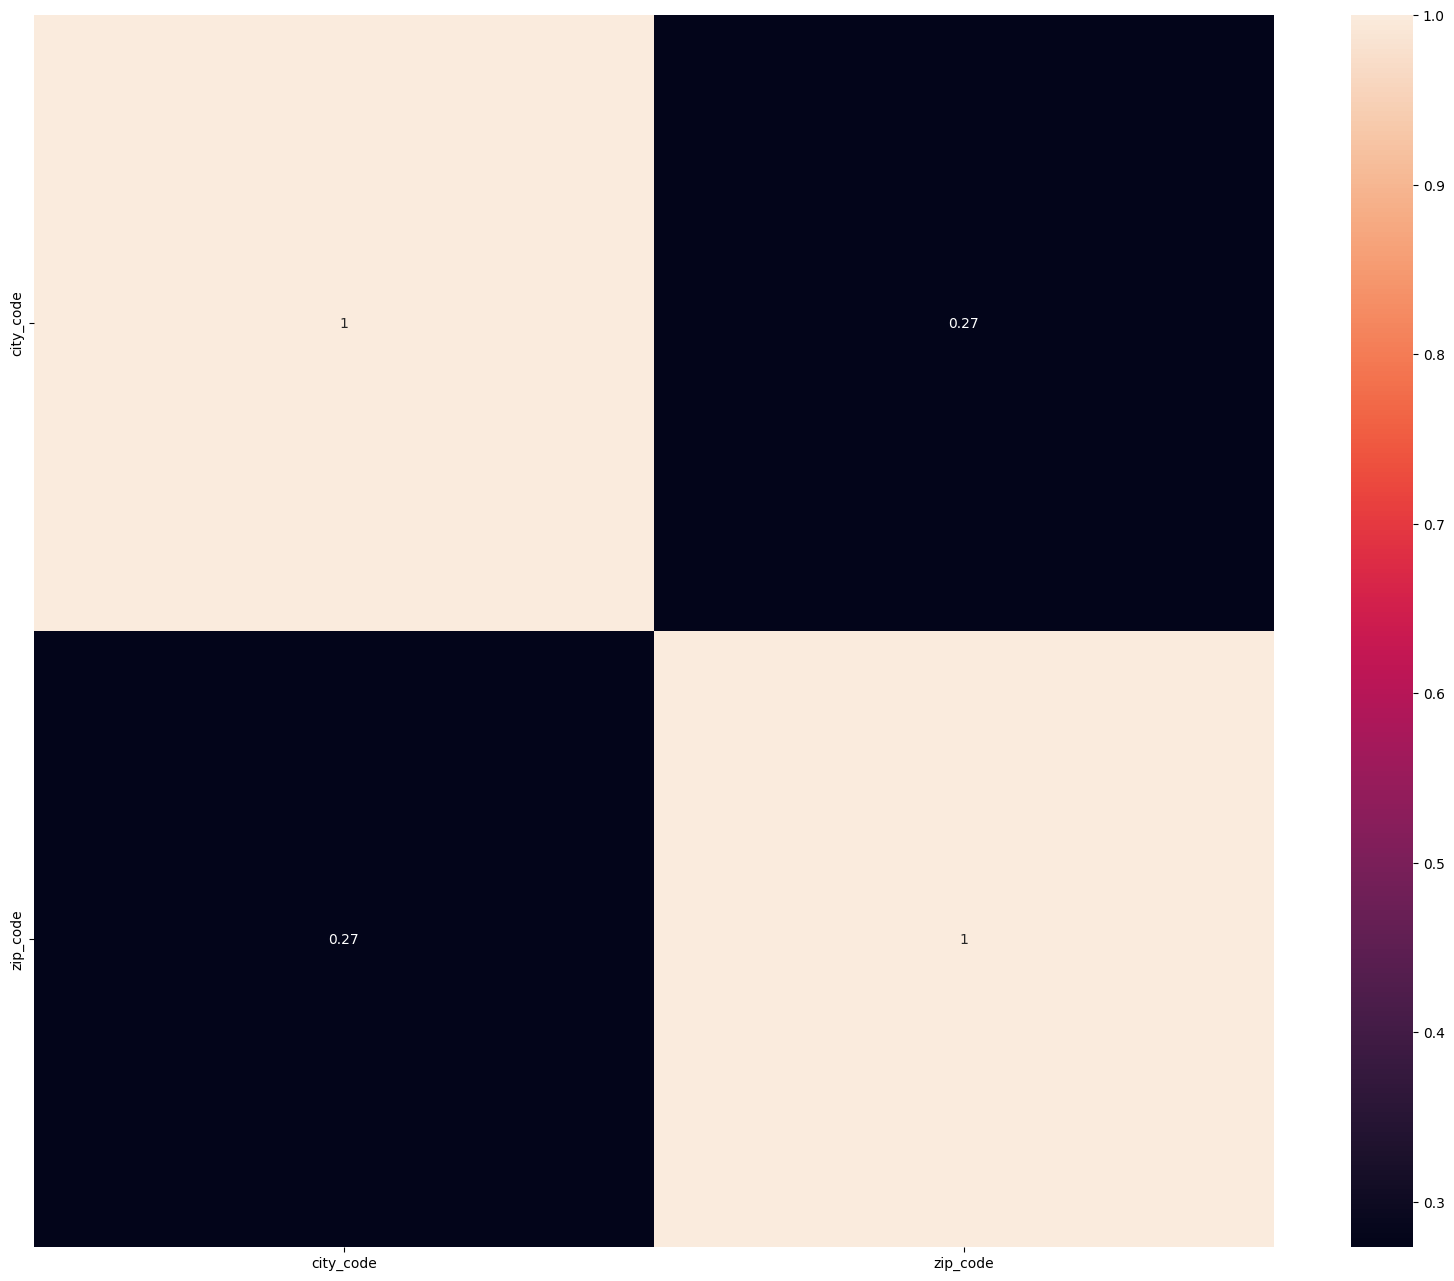

In [51]:
sbn.heatmap(df[['city', 'city_code', 'zip_code']].corr(numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (15,7)

plt.show()

We have somewhat of a relationship between city_code and zip_code. Maybe because there's a pattern for zip_code to represent each address in each city.   
Let's confirm that

In [52]:
df['zip_code'].unique()

array([85440000, 87900000, 87065005, ..., 85855606, 85911053, 87035065])

Actually, it's just faster if we consult IBGE, Correios or any other brazilian agency instead of finding this pattern within our data.

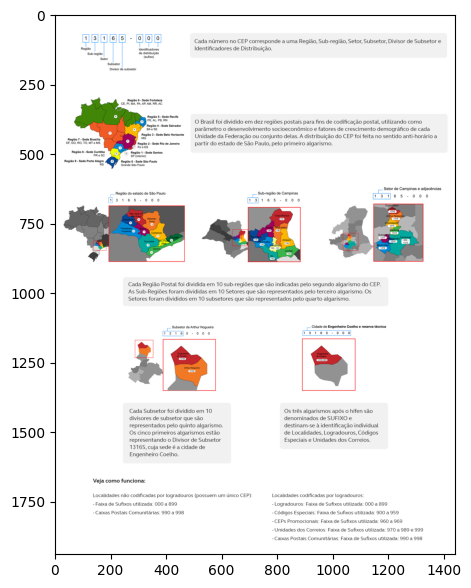

In [53]:
img = mpimg.imread('cep_description.png')
imgplot = plt.imshow(img)

plt.show()

#### **Is it possible to catch any spatial relationships? Which visualizations would be best in this case?**

In [54]:
grouped_cities = df.groupby(by='city_code')['cnpj_basico'].count().reset_index().rename(columns={'cnpj_basico': 'Companies'})
grouped_cities.head()

,city_code,Companies
0,4100103,307
1,4100202,345
2,4100301,548
3,4100400,6585
4,4100459,155


In [55]:
# Download all municipalities of PR
all_muni = geobr.read_municipality(code_muni="PR", year=2020)

In [56]:
muni = all_muni.merge(grouped_cities, how='left', left_on='code_muni', right_on='city_code')
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,city_code,Companies
0,"4,100,103.000",Abatiá,41.000,PR,Paraná,4.000,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826 -23.23384, -50.22482 -23.23743, -50.21508 -23.238...",4100103,307
1,"4,100,202.000",Adrianópolis,41.000,PR,Paraná,4.000,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061 -24.63858, -49.00431 -24.63778, -49.00540 -24.639...",4100202,345
2,"4,100,301.000",Agudos Do Sul,41.000,PR,Paraná,4.000,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541 -25.95041, -49.30391 -25.95117, -49.30401 -25.957...",4100301,548
3,"4,100,400.000",Almirante Tamandaré,41.000,PR,Paraná,4.000,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277 -25.23020, -49.25293 -25.23510, -49.25086 -25.234...",4100400,6585
4,"4,100,459.000",Altamira Do Paraná,41.000,PR,Paraná,4.000,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153 -24.71841, -52.79698 -24.72076, -52.78565 -24.731...",4100459,155


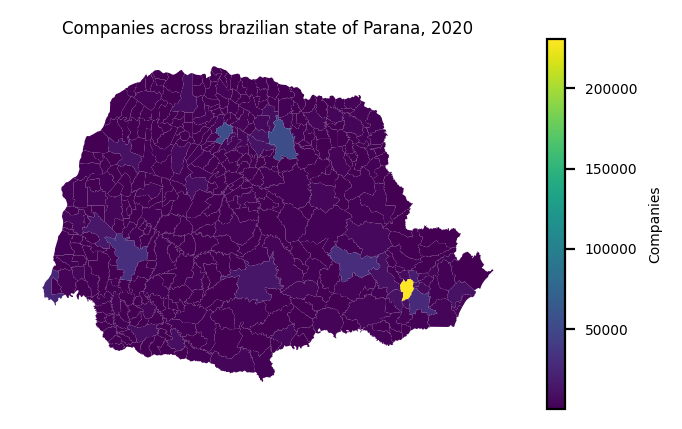

In [57]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

muni.plot(
    column="Companies",
    cmap="viridis",
    legend=True,
    legend_kwds={
        "label": "Companies",
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Companies across brazilian state of Parana, 2020")
ax.axis("off")
plt.show()

In [58]:
t = grouped_cities.merge(df, how='left', left_on='city_code', right_on='city_code')
t = t[['city', 'Companies']].drop_duplicates().sort_values(by='Companies', ascending=False).head(10)
t

,city,Companies
196716,Curitiba,230573
560184,Londrina,53723
636647,Maringá,53266
115591,Cascavel,31449
789147,Ponta Grossa,29708
876609,São José dos Pinhais,27790
450034,Foz do Iguaçu,24895
165076,Colombo,17293
938393,Toledo,13698
493260,Guarapuava,13513


In [59]:
t = grouped_cities.merge(df, how='left', left_on='city_code', right_on='city_code')
t = t[['city', 'Companies']].drop_duplicates().sort_values(by='Companies', ascending=False).head(10)
t = t['Companies'] / t['Companies'].sum()
t

196716   0.465
560184   0.108
636647   0.107
115591   0.063
789147   0.060
876609   0.056
450034   0.050
165076   0.035
938393   0.028
493260   0.027
Name: Companies, dtype: float64

In [60]:
t = grouped_cities.merge(df, how='left', left_on='city_code', right_on='city_code')
t = t[['city', 'Companies']].drop_duplicates().sort_values(by='Companies', ascending=False).head(10)
t['Companies'] = t['Companies'] * 100/ t['Companies'].sum()
t.iloc[:4].sum()

city         CuritibaLondrinaMaringáCascavel
Companies                             74.411
dtype: object

In [61]:
t = t.sort_values(by='Companies')
fig = px.bar(t, x='Companies', y='city', orientation='h')
fig.update_yaxes(showgrid=False, title='Companies')
fig.update_xaxes(showgrid=False, ticksuffix="%")
fig.show()

In [62]:
type(muni)

geopandas.geodataframe.GeoDataFrame

In [63]:
req = requests.get('https://raw.githubusercontent.com/kelvins/municipios-brasileiros/main/csv/municipios.csv')
req

<Response [200]>

In [64]:
file_municipios = 'municipios_lat_long.csv'
with open(file_municipios, 'wb+') as f:
    f.write(req.content)

In [65]:
all_municipios = pd.read_csv('municipios_lat_long.csv')

In [66]:
all_municipios = all_municipios[all_municipios['codigo_uf'] == 41]
map_scatter = pd.merge(all_municipios, grouped_cities, how='left', left_on='codigo_ibge', right_on='city_code').fillna(0)
map_scatter.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,city_code,Companies
0,4100103,Abatiá,-23.305,-50.313,0,41,7401,43,America/Sao_Paulo,4100103,307
1,4100202,Adrianópolis,-24.661,-48.992,0,41,7403,41,America/Sao_Paulo,4100202,345
2,4100301,Agudos do Sul,-25.990,-49.334,0,41,7405,41,America/Sao_Paulo,4100301,548
3,4100400,Almirante Tamandaré,-25.319,-49.304,0,41,7407,41,America/Sao_Paulo,4100400,6585
4,4100459,Altamira do Paraná,-24.798,-52.713,0,41,8455,44,America/Sao_Paulo,4100459,155


In [67]:
map_scatter = map_scatter.drop_duplicates()

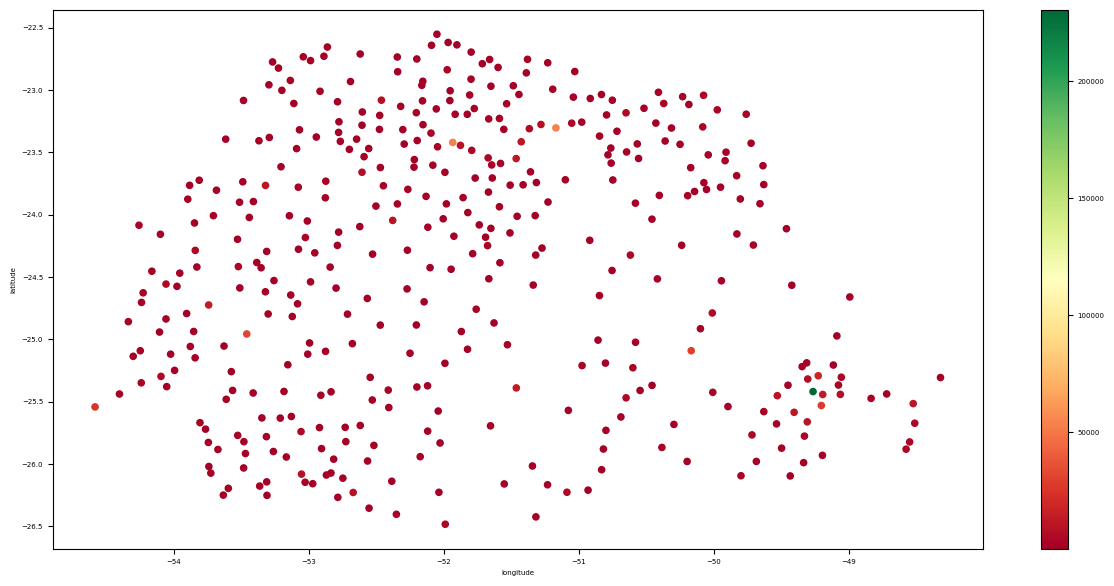

In [68]:
map_scatter.plot.scatter(x='longitude', y='latitude', c=map_scatter['Companies'], cmap='RdYlGn')
plt.show()